In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Comparing Mean Shear vs PSF g1 & g2, PSF T, Tgal, SNR

In [2]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [3]:
def cleanup(file):
    remove = ['[','\n']
    f = file.read()
    for char in remove:
        f = f.replace(char, '')
    f=f.split(']')
    
    fnew=[]
    for data in f:
        datai = []
        for i in np.asarray(data.split(' ')):
            if is_number(i):
                datai.append(float(i))
        fnew.append(np.array(datai))
    return fnew


    

In [4]:
# KiDS
file = open('../TXPipe/data/kids/outputs/g_psf_g_out.txt','r')

k_psfg = cleanup(file)

file = open('../TXPipe/data/kids/outputs/g_psf_T_out.txt','r')

kpsfT = cleanup(file)

file = open('../TXPipe/data/kids/outputs/g_T_out.txt','r')

kT = cleanup(file)

file = open('../TXPipe/data/kids/outputs/g_snr_out.txt','r')

ksnr = cleanup(file)

In [49]:
# DESY1
file = open('../TXPipe/data/desy1/outputs/inprogress_g_psf_g_out.txt','r')

y1_psfg = cleanup(file)

file = open('../TXPipe/data/desy1/outputs/g_psf_T_out.txt','r')

y1psfT = cleanup(file)

file = open('../TXPipe/data/desy1/outputs/g_T_out.txt','r')

y1T = cleanup(file)

file = open('../TXPipe/data/desy1/outputs/g_snr_out.txt','r')

y1snr = cleanup(file)

In [6]:
# DESY3
file = open('../TXPipe/data/desy3/outputs_cut-cp2/g_psf_g_out.txt','r')

y3_psfg = cleanup(file)

file = open('../TXPipe/data/desy3/outputs_cut-cp2/g_psf_T_out.txt','r')

y3psfT = cleanup(file)

file = open('../TXPipe/data/desy3/outputs_cut-cp2/g_T_out.txt','r')

y3T = cleanup(file)

file = open('../TXPipe/data/desy3/outputs_cut-cp2/g_snr_out.txt','r')

y3snr = cleanup(file)

In [7]:
# HSCY1
file = open('../TXPipe/data/hscy1/outputs/g_psf_g_out.txt','r')

hsc_psfg = cleanup(file)

file = open('../TXPipe/data/hscy1/outputs/g_psf_T_out.txt','r')

hscpsfT = cleanup(file)

file = open('../TXPipe/data/hscy1/outputs/g_T_out.txt','r')

hscT = cleanup(file)

file = open('../TXPipe/data/hscy1/outputs/g_snr_out.txt','r')

hscsnr = cleanup(file)

In [8]:
import matplotlib
font = {}
font = {'family': 'Serif',
        'size'   : '20'}

matplotlib.rc('font', **font)

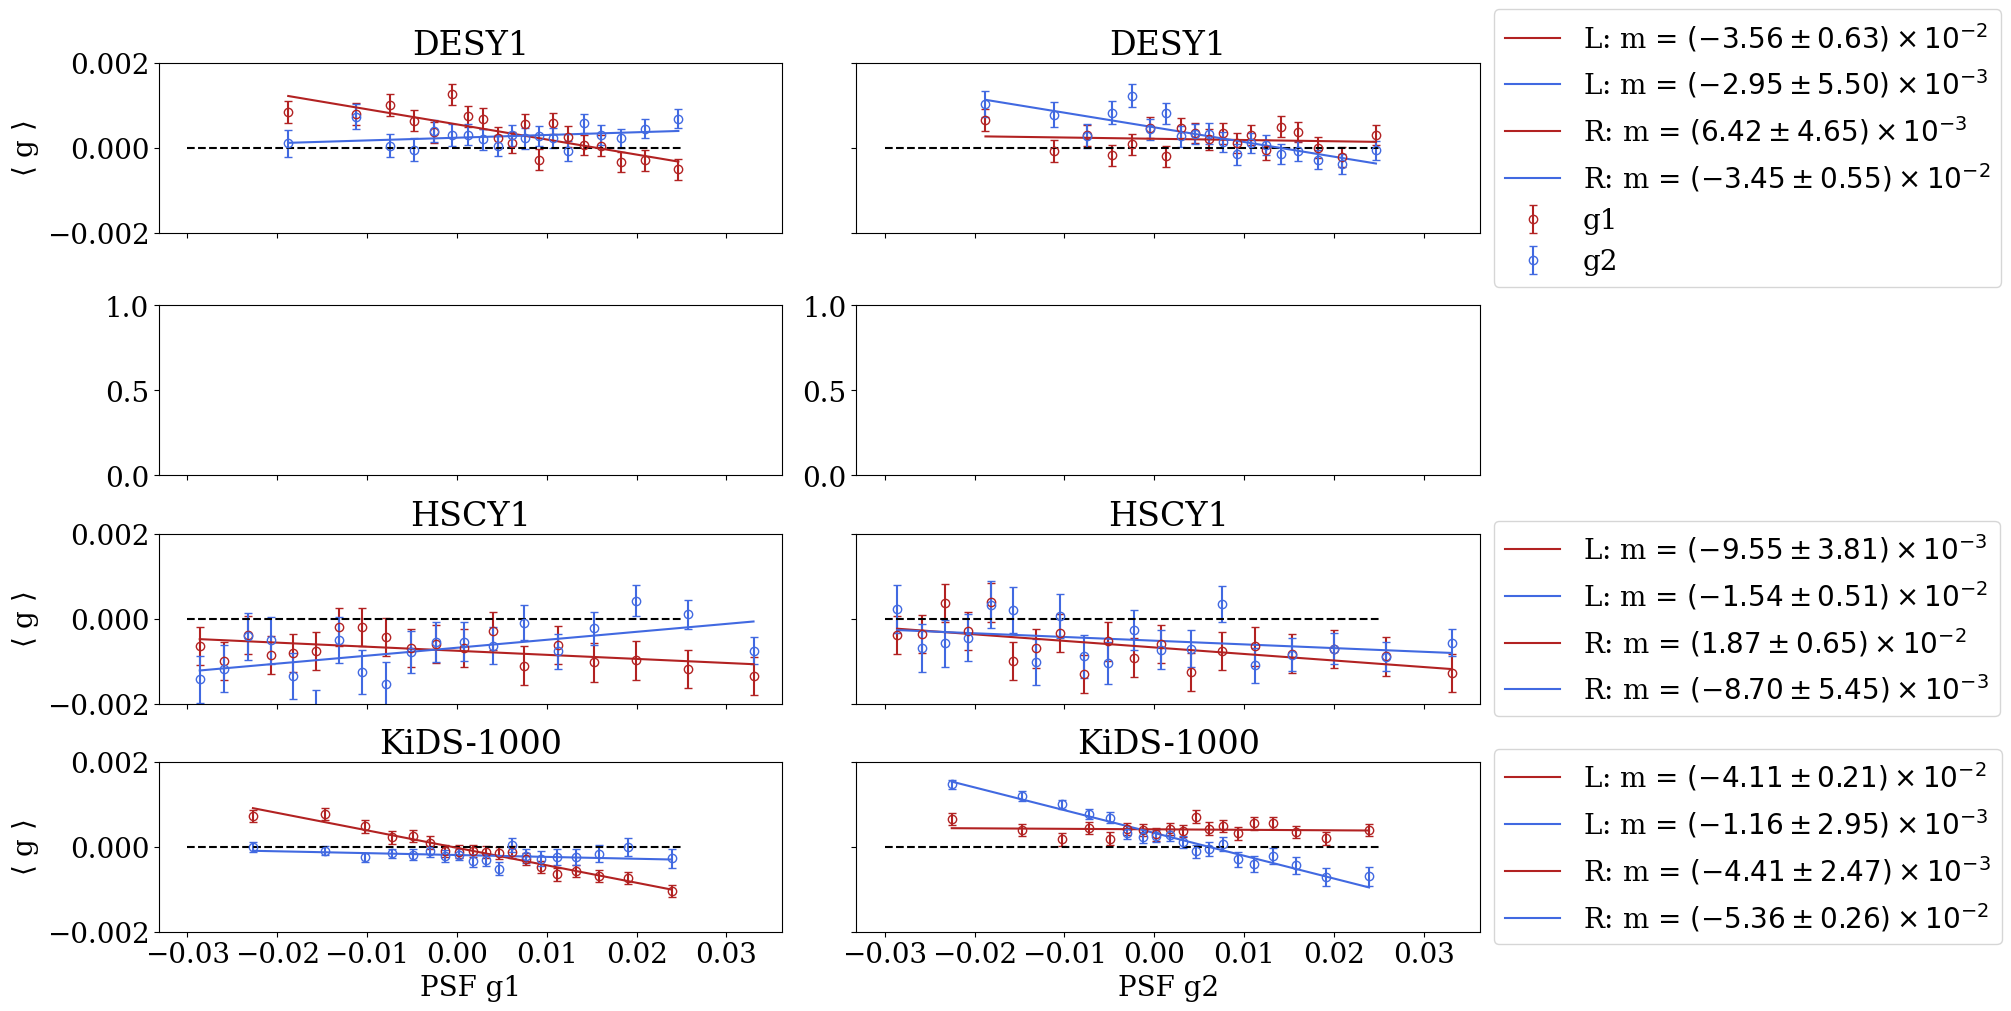

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True,figsize=(20, 10),layout='constrained')
ax1, ax2, ax3, ax4, ax5, ax6,ax7,ax8 = ax.flatten()

#just to compare y1 and y3..
#fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True,figsize=(8, 6),layout='constrained')
#ax1, ax2, ax3, ax4,= ax.flatten()

ax1.set_title('DESY1')
ax1.errorbar(y1_psfg[0],y1_psfg[2],y1_psfg[6], color='firebrick',linestyle='None',marker='o',mfc='None',capsize=3)
ax1.errorbar(y1_psfg[0],y1_psfg[4],y1_psfg[8], color='royalblue',linestyle='None',marker='o',mfc='None',capsize=3)
ax1.plot(np.arange(-0.03,0.03,0.005),np.zeros(len(np.arange(-0.03,0.03,0.005))),color='black',linestyle='dashed')
ax1.plot(y1_psfg[0],y1_psfg[10],color='firebrick',label=r'L: m = $(-3.56 \pm 0.63) \times 10^{-2}$')
ax1.plot(y1_psfg[0],y1_psfg[12],color='royalblue',label=r'L: m = $(-2.95 \pm 5.50) \times 10^{-3}$')
ax1.set_ylim([-0.002,0.002])
ax1.set_ylabel(r'$\langle$ g $\rangle$')

ax2.set_title('DESY1')
ax2.errorbar(y1_psfg[1],y1_psfg[3],y1_psfg[7], color='firebrick',linestyle='None',marker='o',mfc='None',capsize=3,label='g1')
ax2.errorbar(y1_psfg[1],y1_psfg[5],y1_psfg[9], color='royalblue',linestyle='None',marker='o',mfc='None',capsize=3,label='g2')
ax2.plot(np.arange(-0.03,0.03,0.005),np.zeros(len(np.arange(-0.03,0.03,0.005))),color='black',linestyle='dashed')
g2fit1 = ax2.plot(y1_psfg[1],y1_psfg[11],color='firebrick',label=r'R: m = $(6.42 \pm 4.65) \times 10^{-3}$')
g2fit2 = ax2.plot(y1_psfg[1],y1_psfg[13],color='royalblue',label=r'R: m = $(-3.45 \pm 0.55) \times 10^{-2}$')
ax2.yaxis.set_tick_params(labelleft=False)
ax2.set_ylim([-0.002,0.002])
g1h,g1fits = ax1.get_legend_handles_labels()
g2h,g2fits = ax2.get_legend_handles_labels()
ax2.legend(g1h+g2h, g1fits+g2fits, loc='center left', bbox_to_anchor=(1, 0.5))

'''
ax3.set_title('DESY3')
ax3.errorbar(y3_psfg[0],y3_psfg[2],y3_psfg[6], color='firebrick',linestyle='None',marker='o',mfc='None',capsize=3,label = 'desy1 g1')
ax3.errorbar(y3_psfg[0],y3_psfg[4],y3_psfg[8], color='royalblue',linestyle='None',marker='o',mfc='None',capsize=3,label = 'desy1 g2')
ax3.plot(np.arange(-0.03,0.03,0.005),np.zeros(len(np.arange(-0.03,0.03,0.005))),color='black',linestyle='dashed')
ax3.plot(y3_psfg[0],y3_psfg[10],color='firebrick')
ax3.plot(y3_psfg[0],y3_psfg[12],color='royalblue')

ax3.set_ylim([-0.004,0.004])
ax3.set_ylabel(r'$\langle$ g $\rangle$')
#ax1.set_xlabel('PSF g1')

ax4.set_title('DESY3')
ax4.errorbar(y3_psfg[1],y3_psfg[3],y3_psfg[7], color='firebrick',linestyle='None',marker='o',mfc='None',capsize=3,label = 'g1')
ax4.errorbar(y3_psfg[1],y3_psfg[5],y3_psfg[9], color='royalblue',linestyle='None',marker='o',mfc='None',capsize=3,label = 'g2')
ax4.plot(np.arange(-0.03,0.03,0.005),np.zeros(len(np.arange(-0.03,0.03,0.005))),color='black',linestyle='dashed')
ax4.plot(y3_psfg[1],y3_psfg[11],color='firebrick')
ax4.plot(y3_psfg[1],y3_psfg[13],color='royalblue')
ax4.yaxis.set_tick_params(labelleft=False)
#ax2.set_yticks([])
ax4.set_ylim([-0.004,0.004])
#ax2.set_xlabel('PSF g2')
'''
ax5.set_title('HSCY1')
ax5.errorbar(hsc_psfg[0],hsc_psfg[2]/2,hsc_psfg[6]/2, color = 'firebrick',linestyle='None',marker='o',mfc='None',capsize=3)
ax5.errorbar(hsc_psfg[0],hsc_psfg[4]/2,hsc_psfg[8]/2, color='royalblue',linestyle='None',marker='o',mfc='None',capsize=3)
ax5.plot(np.arange(-0.03,0.03,0.005),np.zeros(len(np.arange(-0.03,0.03,0.005))),color='black',linestyle='dashed')
ax5.plot(hsc_psfg[0],hsc_psfg[10]/2,color='firebrick',label=r'L: m = $(-9.55 \pm 3.81) \times 10^{-3}$')
ax5.plot(hsc_psfg[0],hsc_psfg[12]/2,color='royalblue',label=r'L: m = $(-1.54 \pm 0.51) \times 10^{-2}$')

ax5.set_ylim([-0.002,0.002])
ax5.set_ylabel(r'$\langle$ g $\rangle$')
#ax3.set_xlabel('PSF g1')

ax6.set_title('HSCY1')
ax6.errorbar(hsc_psfg[1],hsc_psfg[3]/2,hsc_psfg[7]/2, color = 'firebrick',linestyle='None',marker='o',mfc='None',capsize=3)
ax6.errorbar(hsc_psfg[1],hsc_psfg[5]/2,hsc_psfg[9]/2, color='royalblue',linestyle='None',marker='o',mfc='None',capsize=3)
ax6.plot(np.arange(-0.03,0.03,0.005),np.zeros(len(np.arange(-0.03,0.03,0.005))),color='black',linestyle='dashed')
ax6.plot(hsc_psfg[1],hsc_psfg[11]/2,color='firebrick',label=r'R: m = $(1.87 \pm 0.65) \times 10^{-2}$')
ax6.plot(hsc_psfg[1],hsc_psfg[13]/2,color='royalblue',label=r'R: m = $(-8.70 \pm 5.45) \times 10^{-3}$')
ax6.yaxis.set_tick_params(labelleft=False)
#ax4.set_yticks([])
ax6.set_ylim([-0.002,0.002])
g1h,g1fits = ax5.get_legend_handles_labels()
g2h,g2fits = ax6.get_legend_handles_labels()
ax6.legend(g1h+g2h, g1fits+g2fits, loc='center left', bbox_to_anchor=(1, 0.5))

#ax4.set_xlabel('PSF g2')


ax7.set_title('KiDS-1000')
ax7.errorbar(k_psfg[0],k_psfg[2],k_psfg[6], color='firebrick',linestyle='None',marker='o',mfc='None',capsize=3)
ax7.errorbar(k_psfg[0],k_psfg[4],k_psfg[8], color='royalblue',linestyle='None',marker='o',mfc='None',capsize=3)
ax7.plot(np.arange(-0.03,0.03,0.005),np.zeros(len(np.arange(-0.03,0.03,0.005))),color='black',linestyle='dashed')
ax7.plot(k_psfg[0],k_psfg[10],color='firebrick',label=r'L: m = $(-4.11 \pm 0.21) \times 10^{-2}$')
ax7.plot(k_psfg[0],k_psfg[12],color='royalblue',label=r'L: m = $(-1.16 \pm 2.95) \times 10^{-3}$')

ax7.set_ylim([-0.002,0.002])
ax7.set_ylabel(r'$\langle$ g $\rangle$')
ax7.set_xlabel('PSF g1')

ax8.set_title('KiDS-1000')
ax8.errorbar(k_psfg[1],k_psfg[3],k_psfg[7], color='firebrick',linestyle='None',marker='o',mfc='None',capsize=3)
ax8.errorbar(k_psfg[1],k_psfg[5],k_psfg[9], color='royalblue',linestyle='None',marker='o',mfc='None',capsize=3)
ax8.plot(np.arange(-0.03,0.03,0.005),np.zeros(len(np.arange(-0.03,0.03,0.005))),color='black',linestyle='dashed')
ax8.plot(k_psfg[1],k_psfg[11],color='firebrick',label=r'R: m = $(-4.41 \pm 2.47) \times 10^{-3}$')
ax8.plot(k_psfg[1],k_psfg[13],color='royalblue',label=r'R: m = $(-5.36 \pm 0.26) \times 10^{-2}$')
ax8.yaxis.set_tick_params(labelleft=False)
#ax6.set_yticks([])
ax8.set_ylim([-0.002,0.002])
ax8.set_xlabel('PSF g2')
g1h,g1fits = ax7.get_legend_handles_labels()
g2h,g2fits = ax8.get_legend_handles_labels()
ax8.legend(g1h+g2h, g1fits+g2fits, loc='center left', bbox_to_anchor=(1, 0.5))


fig.show()
fig.savefig('comp_psfg.png')

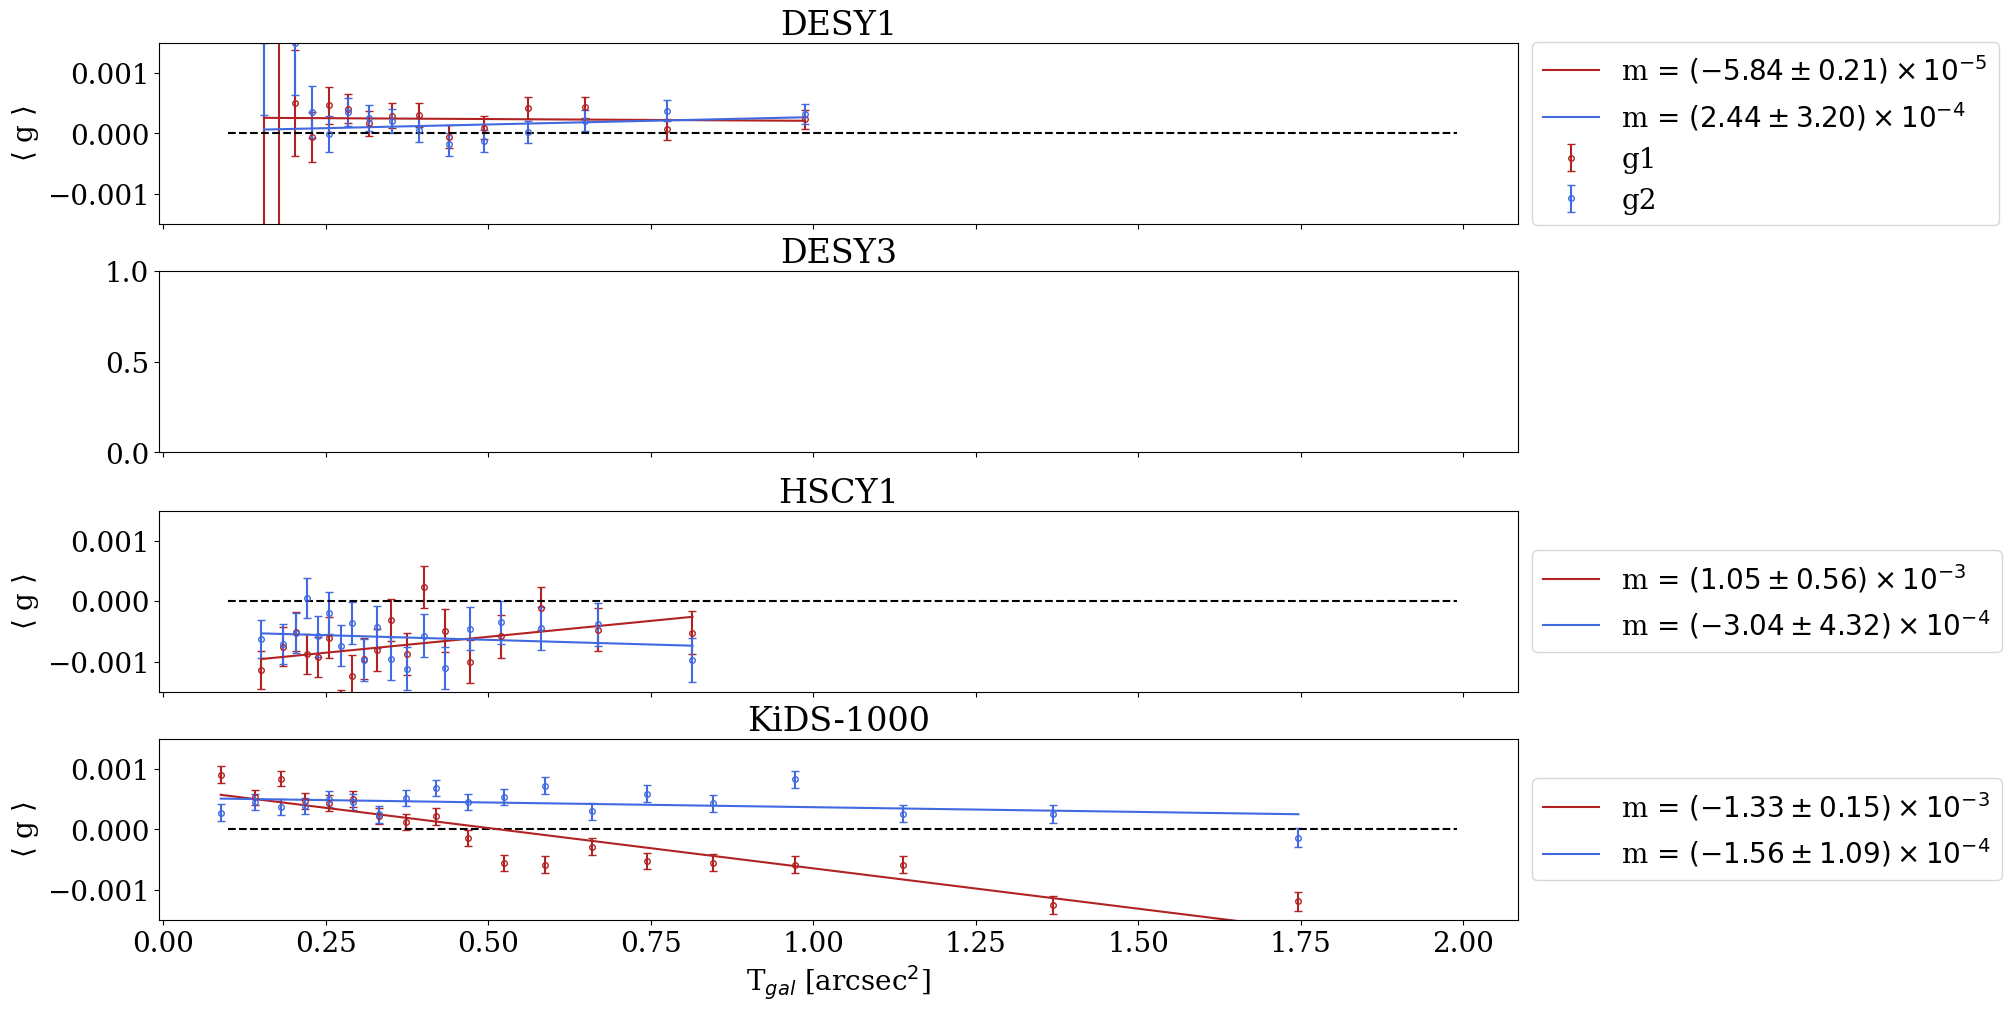

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True,figsize=(20, 10),layout='constrained')
ax1, ax2, ax3, ax4 = ax.flatten()
#just to compare y1 and y3
#fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(8, 6),layout='constrained')
#ax1, ax2= ax.flatten()

ax1.set_title('DESY1')
ax1.errorbar(y1T[0][4:],y1T[1][4:],y1T[3][4:], color='firebrick',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3,label = 'g1')
ax1.errorbar(y1T[0][4:],y1T[2][4:],y1T[4][4:], color='royalblue',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3,label = 'g2')
ax1.plot(np.arange(0.1,2,0.01),np.zeros(len(np.arange(0.1,2,0.01))),color='black',linestyle='dashed')

ax1.plot(y1T[0][4:],y1T[5][4:],color='firebrick',label=r'm = $(-5.84 \pm 0.21) \times 10^{-5}$')
ax1.plot(y1T[0][4:],y1T[6][4:],color='royalblue',label=r'm = $(2.44 \pm 3.20) \times 10^{-4}$')
#ax1.set_xscale('log')
ax1.set_ylim([-0.0015,0.0015])
ax1.set_ylabel(r'$\langle$ g $\rangle$')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2.set_title('DESY3')
'''
ax2.errorbar(y3T[0][4:],y3T[1][4:],y3T[3][4:], color='firebrick',linestyle='None',marker='o',mfc='None',capsize=3,label = 'g1')
ax2.errorbar(y3T[0][4:],y3T[2][4:],y3T[4][4:], color='royalblue',linestyle='None',marker='o',mfc='None',capsize=3,label = 'g2')
ax2.plot(np.arange(0.1,2,0.01),np.zeros(len(np.arange(0.1,2,0.01))),color='black',linestyle='dashed')

ax2.plot(y3T[0][4:],y3T[5][4:],color='firebrick')
ax2.plot(y3T[0][4:],y3T[6][4:],color='royalblue')
ax2.set_ylabel(r'$\langle$ g $\rangle$')
ax2.set_xscale('log')
ax2.set_ylim([-0.01,0.01])
ax4.set_xlabel(r'T$_{gal}$')
'''

ax3.set_title('HSCY1')
ax3.errorbar(hscT[0],hscT[1]/2,hscT[3]/2, color = 'firebrick',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3)
ax3.errorbar(hscT[0],hscT[2]/2,hscT[4]/2, color = 'royalblue',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3)
ax3.plot(np.arange(0.1,2,0.01),np.zeros(len(np.arange(0.1,2,0.01))),color='black',linestyle='dashed')

ax3.plot(hscT[0],hscT[5]/2,color='firebrick',label=r'm = $(1.05 \pm 0.56) \times 10^{-3}$')
ax3.plot(hscT[0],hscT[6]/2,color='royalblue',label=r'm = $(-3.04 \pm 4.32) \times 10^{-4}$')
#ax3.set_xscale('log')
ax3.set_ylim([-0.0015,0.0015])
ax3.set_ylabel(r'$\langle$ g $\rangle$')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax2.set_xlabel('T')

ax4.set_title('KiDS-1000')
ax4.errorbar(kT[0],kT[1],kT[3], color='firebrick',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3)
ax4.errorbar(kT[0],kT[2],kT[4], color='royalblue',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3)
ax4.plot(np.arange(0.1,2,0.01),np.zeros(len(np.arange(0.1,2,0.01))),color='black',linestyle='dashed')

ax4.plot(kT[0],kT[5],color='firebrick',label=r'm = $(-1.33 \pm 0.15) \times 10^{-3}$')
ax4.plot(kT[0],kT[6],color='royalblue',label=r'm = $(-1.56 \pm 1.09) \times 10^{-4}$')
#ax4.set_xscale('log')
ax4.set_ylim([-0.0015,0.0015])
ax4.set_ylabel(r'$\langle$ g $\rangle$')
ax4.set_xlabel(r'T$_{gal}$ [arcsec$^2$]')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('./plots/comp_Tgal.png')

plt.show()



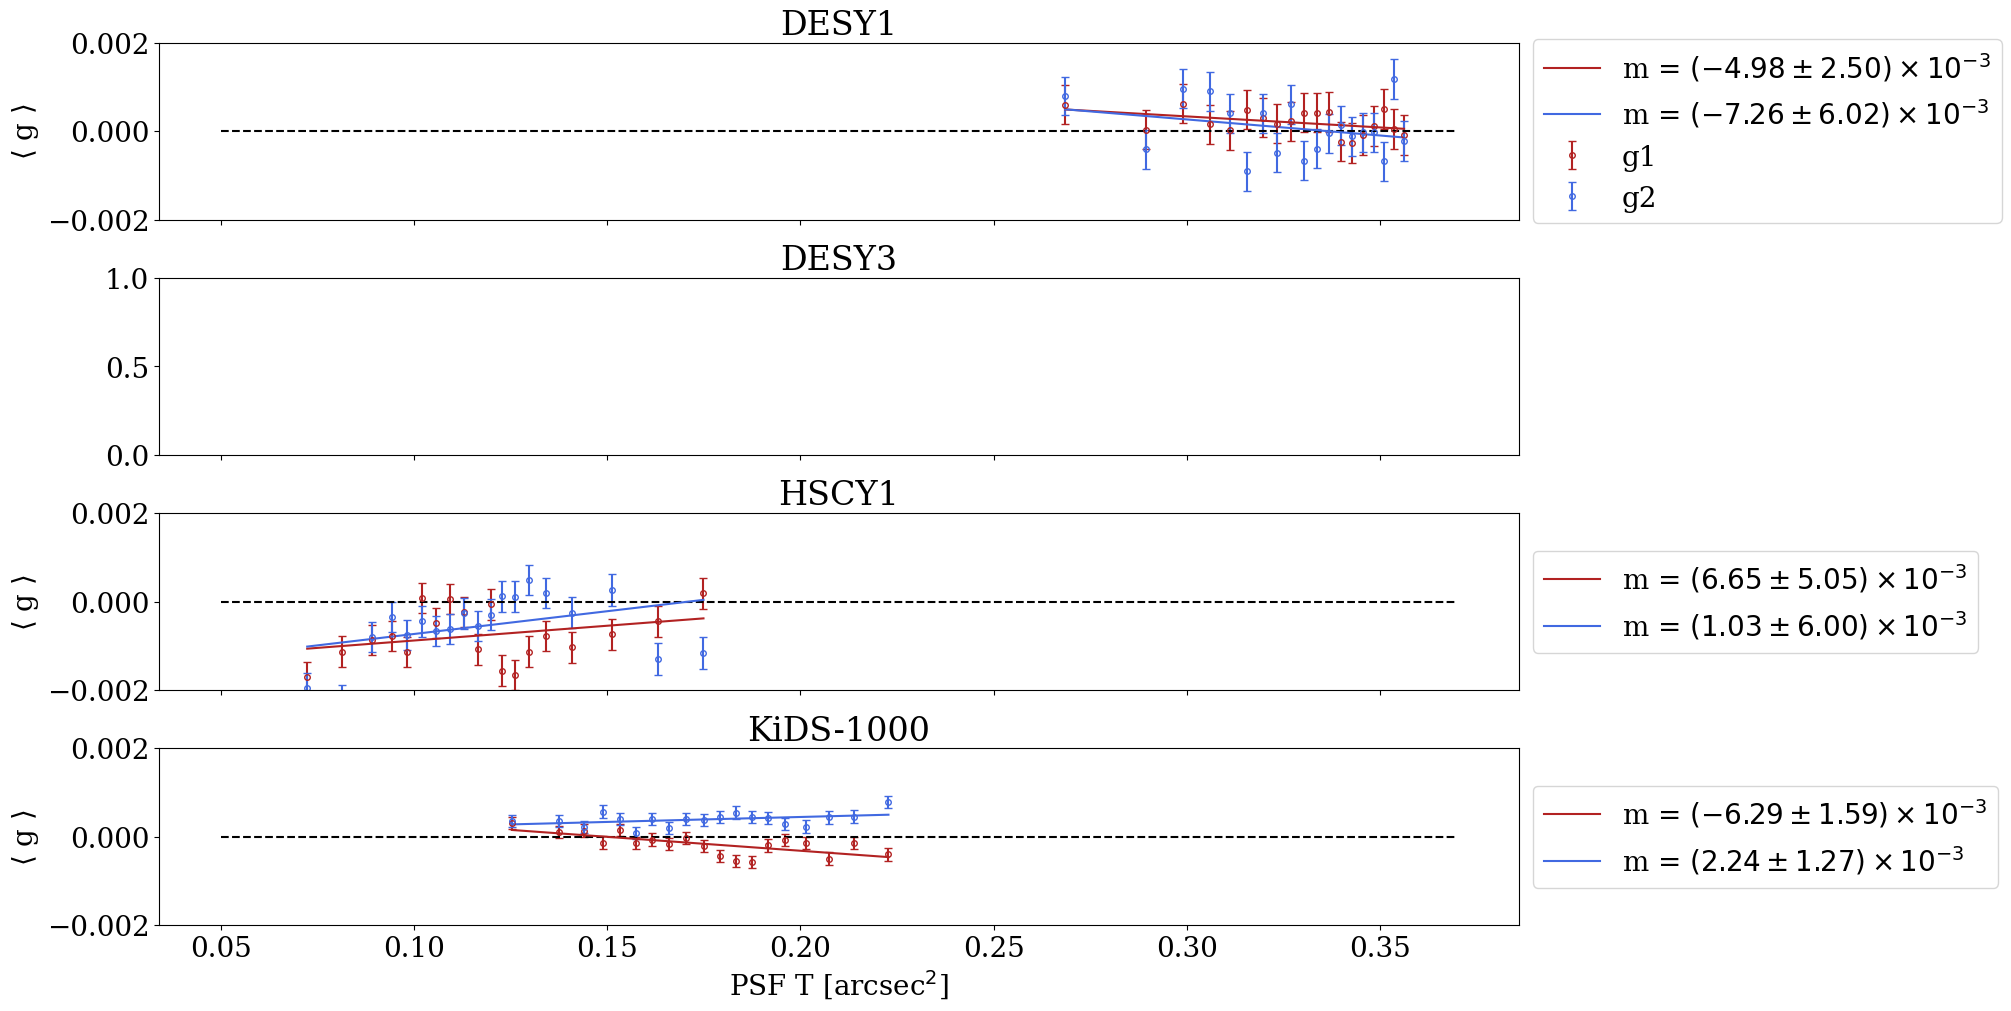

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True,figsize=(20, 10),layout='constrained')
ax1, ax2, ax3,ax4 = ax.flatten()
# just to compare y1 and y3.
#fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(8, 6),layout='constrained')
#ax1, ax2= ax.flatten()
ax1.set_title('DESY1')
ax1.errorbar(y1psfT[0],y1psfT[1],y1psfT[3], color='firebrick',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3,label = 'g1')
ax1.errorbar(y1psfT[0],y1psfT[2],y1psfT[4], color='royalblue',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3,label = 'g2')
ax1.plot(np.arange(0.05,0.38,0.01),np.zeros(len(np.arange(0.05,0.38,0.01))),color='black',linestyle='dashed')

ax1.plot(y1psfT[0],y1psfT[5],color='firebrick',label=r'm = $(-4.98 \pm 2.50) \times 10^{-3}$')
ax1.plot(y1psfT[0],y1psfT[6],color='royalblue',label=r'm = $(-7.26 \pm 6.02) \times 10^{-3}$')
#ax1.set_xscale('log')
ax1.set_ylim([-0.002,0.002])
ax1.set_ylabel(r'$\langle$ g $\rangle$')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax1.set_xlabel('psfT')

ax2.set_title('DESY3')
'''
ax2.errorbar(y3psfT[0],y3psfT[1],y3psfT[3], color='firebrick',linestyle='None',marker='o',mfc='None',capsize=3,label = 'g1')
ax2.errorbar(y3psfT[0],y3psfT[2],y3psfT[4], color='royalblue',linestyle='None',marker='o',mfc='None',capsize=3,label = 'g2')
ax2.plot(np.arange(0.05,0.38,0.01),np.zeros(len(np.arange(0.05,0.38,0.01))),color='black',linestyle='dashed')

ax2.plot(y3psfT[0],y3psfT[5],color='firebrick')
ax2.plot(y3psfT[0],y3psfT[6],color='royalblue')
#ax1.set_xscale('log')
ax2.set_ylim([-0.007,0.007])
ax2.set_ylabel(r'$\langle$ g $\rangle$')
ax2.set_xlabel('psfT')
'''

ax3.set_title('HSCY1')
ax3.errorbar(hscpsfT[0],hscpsfT[1]/2,hscpsfT[3]/2, color = 'firebrick',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3)
ax3.errorbar(hscpsfT[0],hscpsfT[2]/2,hscpsfT[4]/2, color = 'royalblue',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3)
ax3.plot(np.arange(0.05,0.38,0.01),np.zeros(len(np.arange(0.05,0.38,0.01))),color='black',linestyle='dashed')

ax3.plot(hscpsfT[0],hscpsfT[5]/2,color='firebrick',label=r'm = $(6.65 \pm 5.05) \times 10^{-3}$')
ax3.plot(hscpsfT[0],hscpsfT[6]/2,color='royalblue',label=r'm = $(1.03 \pm 6.00) \times 10^{-3}$')
#ax2.set_xscale('log')
ax3.set_ylim([-0.002,0.002])
ax3.set_ylabel(r'$\langle$ g $\rangle$')
#ax2.set_xlabel('psfT')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax4.set_title('KiDS-1000')
ax4.errorbar(kpsfT[0],kpsfT[1],kpsfT[3], color='firebrick',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3)
ax4.errorbar(kpsfT[0],kpsfT[2],kpsfT[4], color='royalblue',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3)
ax4.plot(np.arange(0.05,0.38,0.01),np.zeros(len(np.arange(0.05,0.38,0.01))),color='black',linestyle='dashed')

ax4.plot(kpsfT[0],kpsfT[5],color='firebrick',label=r'm = $(-6.29 \pm 1.59) \times 10^{-3}$')
ax4.plot(kpsfT[0],kpsfT[6],color='royalblue',label=r'm = $(2.24 \pm 1.27) \times 10^{-3}$')
#ax4.set_yscale('symlog')
ax4.set_ylim([-0.002,0.002])
ax4.set_ylabel(r'$\langle$ g $\rangle$')
ax4.set_xlabel(r'PSF T [arcsec$^2$]')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('./plotscomp_PSFT.png')

plt.show()


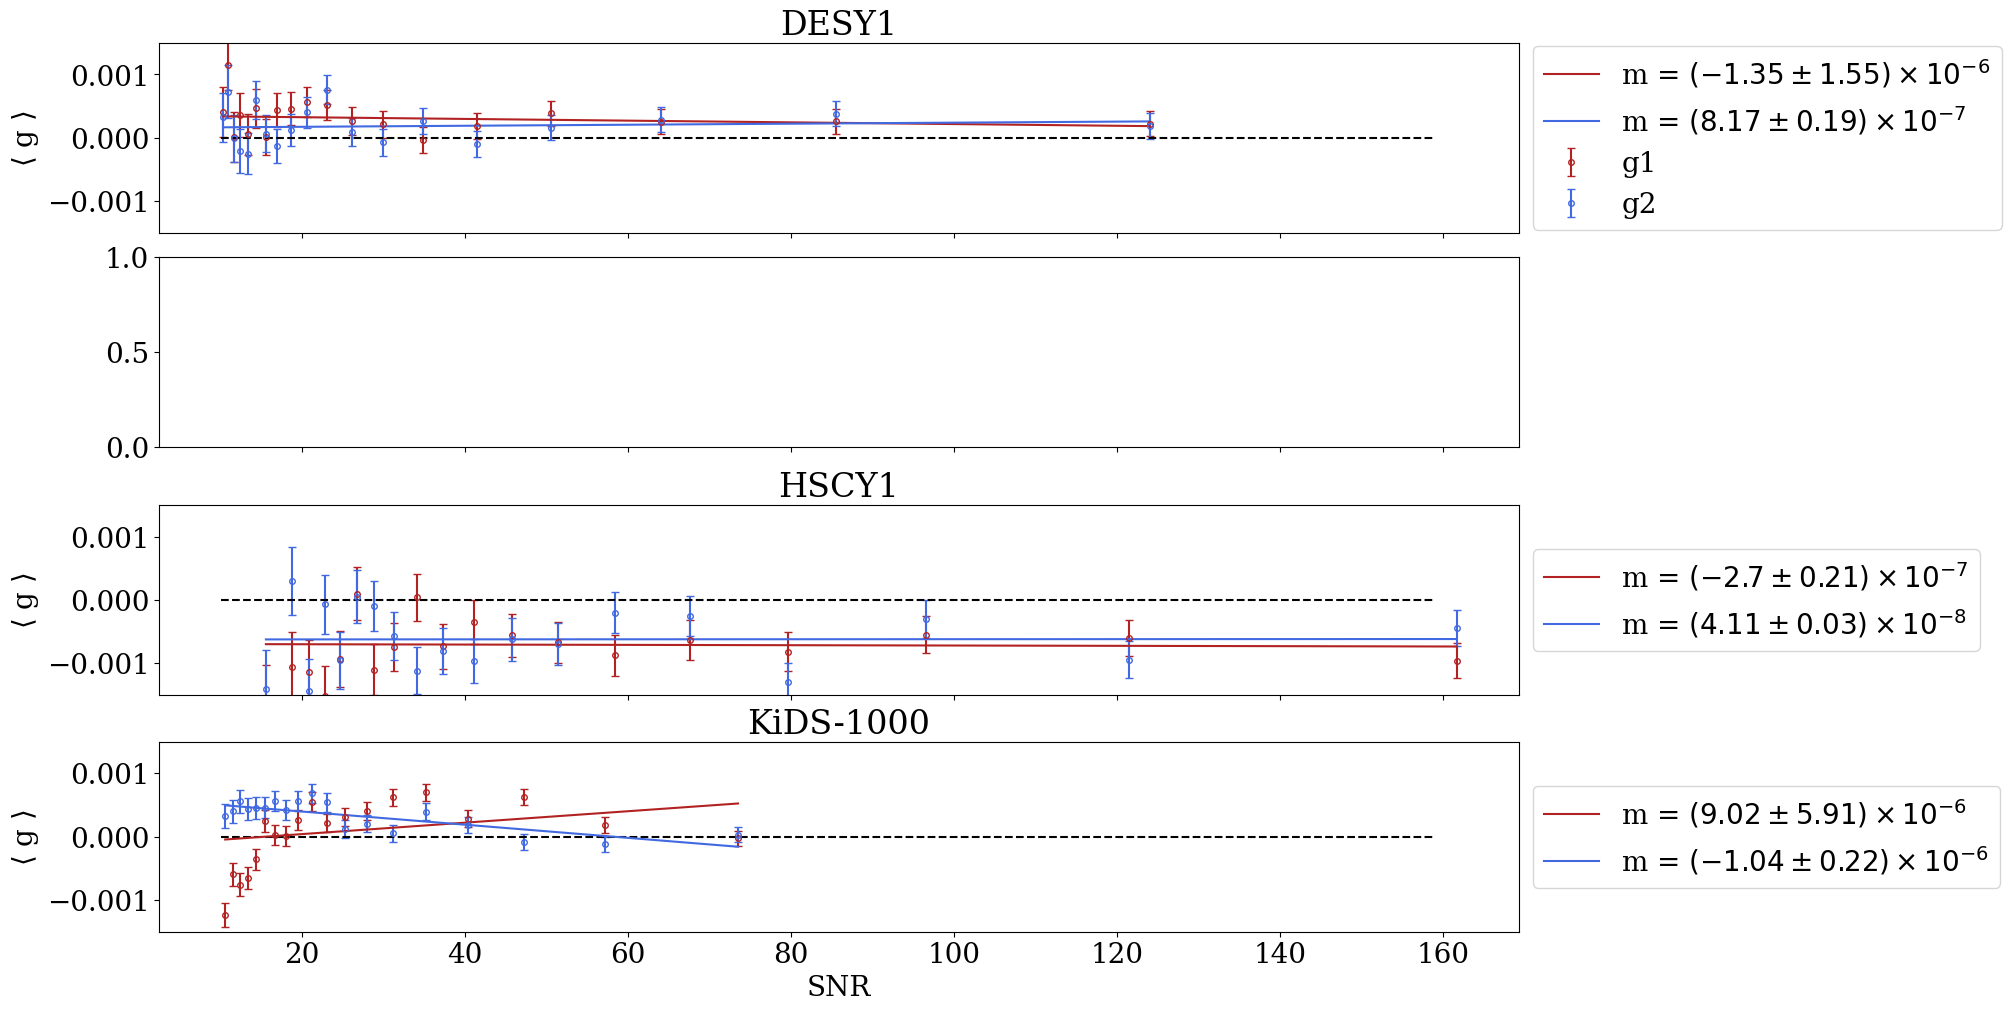

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True,figsize=(20, 10),layout='constrained')
ax1, ax2, ax3,ax4 = ax.flatten()
#just to compare y1 and y3.
#fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(8, 6),layout='constrained')
#ax1, ax2 = ax.flatten()


ax1.set_title('DESY1')
ax1.errorbar(y1snr[0],y1snr[1],y1snr[3], color='firebrick',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3,label = 'g1')
ax1.errorbar(y1snr[0],y1snr[2],y1snr[4], color='royalblue',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3,label = 'g2')
ax1.plot(range(10,160),np.zeros(len(range(10,160))),color='black', linestyle='dashed')

ax1.plot(y1snr[0],y1snr[5],color='firebrick',label=r'm = $(-1.35 \pm 1.55) \times 10^{-6}$')
ax1.plot(y1snr[0],y1snr[6],color='royalblue',label=r'm = $(8.17 \pm 0.19) \times 10^{-7}$')
#ax1.set_xscale('log')
ax1.set_ylim([-0.0015,0.0015])
ax1.set_ylabel(r'$\langle$ g $\rangle$')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax1.set_xlabel('psfT')
'''
ax2.set_title('DESY3')
ax2.errorbar(y3snr[0],y3snr[1],y3snr[3], color='firebrick',linestyle='None',marker='o',mfc='None',capsize=3,label = 'g1')
ax2.errorbar(y3snr[0],y3snr[2],y3snr[4], color='royalblue',linestyle='None',marker='o',mfc='None',capsize=3,label = 'g2')
ax2.plot(range(10,160),np.zeros(len(range(10,160))),color='black', linestyle='dashed')

ax2.plot(y3snr[0],y3snr[5],color='firebrick')
ax2.plot(y3snr[0],y3snr[6],color='royalblue')
#ax1.set_xscale('log')
#ax1.set_ylim([-0.007,0.007])
ax2.set_ylabel(r'$\langle$ g $\rangle$')
ax4.set_xlabel('SNR')
'''
ax3.set_title('HSCY1')
ax3.errorbar(hscsnr[0],hscsnr[1]/2,hscsnr[3]/2, color = 'firebrick',linestyle='None',marker='o',markersize=4,mfc='None',capsize=3)
ax3.errorbar(hscsnr[0],hscsnr[2]/2,hscsnr[4]/2, color = 'royalblue',linestyle='None',marker='o',markersize=4,mfc='None',capsize=3)
ax3.plot(range(10,160),np.zeros(len(range(10,160))),color='black', linestyle='dashed')

ax3.plot(hscsnr[0],hscsnr[5]/2,color='firebrick',label=r'm = $(-2.7 \pm 0.21) \times 10^{-7}$')
ax3.plot(hscsnr[0],hscsnr[6]/2,color='royalblue',label=r'm = $(4.11 \pm 0.03) \times 10^{-8}$') ######CHECK THIS ONE
#ax2.set_xscale('log')
ax3.set_ylim([-0.0015,0.0015])
ax3.set_ylabel(r'$\langle$ g $\rangle$')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax2.set_xlabel('psfT')

ax4.set_title('KiDS-1000')
ax4.errorbar(ksnr[0],ksnr[1],ksnr[3], color='firebrick',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3)
ax4.errorbar(ksnr[0],ksnr[2],ksnr[4], color='royalblue',linestyle='None',marker='o',mfc='None',markersize=4,capsize=3)
ax4.plot(range(10,160),np.zeros(len(range(10,160))),color='black', linestyle='dashed')

ax4.plot(ksnr[0],ksnr[5],color='firebrick',label=r'm = $(9.02 \pm 5.91) \times 10^{-6}$')
ax4.plot(ksnr[0],ksnr[6],color='royalblue',label=r'm = $(-1.04 \pm 0.22) \times 10^{-6}$')
#ax3.set_xscale('log')
ax4.set_ylim([-0.0015,0.0015])
ax4.set_ylabel(r'$\langle$ g $\rangle$')
ax4.set_xlabel('SNR')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('comp_snr.png')

plt.show()


# Comparing Rowe Stats

In [14]:
import h5py 

In [15]:
y1rowe = h5py.File('../TXPipe/data/desy1/outputs/rowe_stats.hdf5','r')
hscrowe = h5py.File('../TXPipe/data/hscy1/outputs/rowe_stats.hdf5','r')
krowe = h5py.File('../TXPipe/data/kids/outputs/rowe_stats.hdf5','r')
y3rowe= h5py.File('../TXPipe/data/desy3/outputs/rowe_stats.hdf5','r')

In [16]:
print(y1rowe['rowe_statistics'].keys())
print(y1rowe['rowe_statistics/rowe_0_PSF-reserved'].keys())


<KeysViewHDF5 ['rowe_0_PSF-reserved', 'rowe_0_PSF-used', 'rowe_1_PSF-reserved', 'rowe_1_PSF-used', 'rowe_2_PSF-reserved', 'rowe_2_PSF-used', 'rowe_3_PSF-reserved', 'rowe_3_PSF-used', 'rowe_4_PSF-reserved', 'rowe_4_PSF-used', 'rowe_5_PSF-reserved', 'rowe_5_PSF-used']>
<KeysViewHDF5 ['theta', 'xi_err', 'xi_plus']>


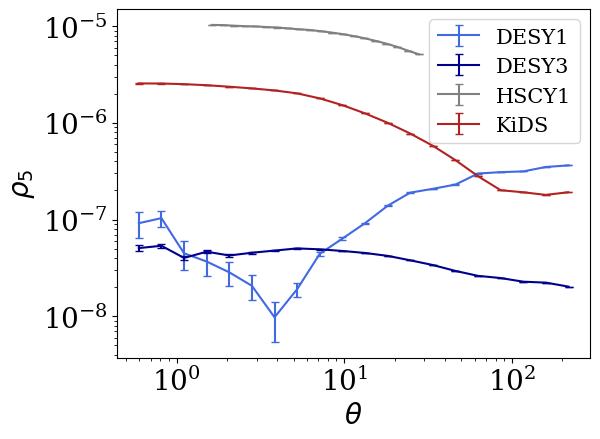

In [42]:
i = 5
fig = plt.figure(layout='tight')

plt.errorbar(np.array(y1rowe[f'rowe_statistics/rowe_{i}_PSF-used/theta']),
                    np.abs(np.array(y1rowe[f'rowe_statistics/rowe_{i}_PSF-used/xi_plus'])),
                    np.array(y1rowe[f'rowe_statistics/rowe_{i}_PSF-used/xi_err']),capsize=3,color='royalblue',label='DESY1')
plt.errorbar(np.array(y3rowe[f'rowe_statistics/rowe_{i}_PSF-used/theta']),
                    np.abs(np.array(y3rowe[f'rowe_statistics/rowe_{i}_PSF-used/xi_plus'])),
                    np.array(y3rowe[f'rowe_statistics/rowe_{i}_PSF-used/xi_err']),capsize=3,color='darkblue',label='DESY3')
plt.errorbar(np.array(hscrowe[f'rowe_statistics/rowe_{i}_PSF-used/theta'])/2,
                    np.abs(np.array(hscrowe[f'rowe_statistics/rowe_{i}_PSF-used/xi_plus']))/2,
                    np.array(hscrowe[f'rowe_statistics/rowe_{i}_PSF-used/xi_err'])/2,capsize=3,color='grey',label='HSCY1')
plt.errorbar(np.array(krowe[f'rowe_statistics/rowe_{i}_PSF-used/theta']),
                    np.abs(np.array(krowe[f'rowe_statistics/rowe_{i}_PSF-used/xi_plus'])),
                    np.array(krowe[f'rowe_statistics/rowe_{i}_PSF-used/xi_err']),capsize=3,color='firebrick',label='KiDS')
plt.xscale('log')
#plt.ylim([9e-5, 2.5e-3])
plt.yscale('log')
plt.ylabel(rf'$\rho_{i}$')
plt.xlabel(rf'$\theta$')
plt.legend(fontsize=15)
plt.savefig(f'./plots/comp_rowe{i}')

# checking size, psf size discrepancy

In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [22]:
y1 = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/shear_catalog_desy1_masked.h5','r')
hscy1 = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/hscy1/shear_cat_FULLCAT.h5','r')
kids = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/kids/shear_catalog_kids1000.hdf5','r')
#kids = fits.open('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/kids/KiDS_DR4.1_ugriZYJHKs_SOM_gold_WL_cat.fits')

In [23]:
fracT = y1['shear/mcal_T'][:][y1['shear/mcal_T'][:]>-1]/y1['shear/mcal_psf_T_mean'][:][y1['shear/mcal_T'][:]>-1]
print(len(fracT))
print(len(fracT[fracT>0.5]))
print(len(y1['shear/mcal_T'][:][y1['shear/mcal_T'][:]>-1][fracT>0.5]))

93263602
49820035
49820035


3842105
3818663
3818663
3818663


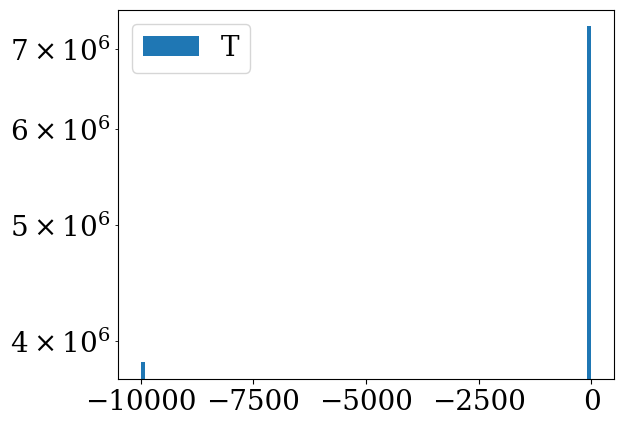

In [24]:
# we have weird values for des:
print(len(y1['shear/mcal_T'][:][y1['shear/mcal_T'][:]<-1]))
print(len(y1['shear/mcal_psf_T_mean'][:][y1['shear/mcal_psf_T_mean'][:]<-1]))
print(len(y1['shear/mcal_psf_g1'][:][y1['shear/mcal_psf_g1'][:]<-1]))
print(len(y1['shear/mcal_psf_g2'][:][y1['shear/mcal_psf_g2'][:]<-1]))

plt.hist(y1['shear/mcal_T'][:][y1['shear/mcal_T'][:]<0],bins=100,label='T')
#plt.hist(y1['shear/mcal_psf_T_mean'][:][y1['shear/mcal_psf_T_mean'][:]<0],bins=100,label='psfT')
#plt.hist(y1['shear/mcal_psf_g1'][:][y1['shear/mcal_psf_g1'][:]<-1],bins=100,label='psfg1')
#plt.hist(y1['shear/mcal_psf_g2'][:][y1['shear/mcal_psf_g2'][:]<-1],bins=100,label='psfg2')
plt.legend()
plt.yscale('log')
plt.show()

In [25]:
#so we need to make cuts. 
cutT = y1['shear/mcal_T'][:]>0
cutpsfT = y1['shear/mcal_psf_T_mean'][:]>0
cutpsfg1 = y1['shear/mcal_psf_g1'][:]>-1
cutpsfg2 = y1['shear/mcal_psf_g2'][:]>-1
cutsnr = y1['shear/mcal_s2n'][:] > 10
cutratio = (y1['shear/mcal_T'][:]/y1['shear/mcal_psf_T_mean'][:]) > 0.5
cutall = cutT & cutpsfT & cutpsfg1 & cutpsfg2 & cutsnr & cutratio

In [26]:
len(y1['shear/mcal_T'][:][cutall])

35345207

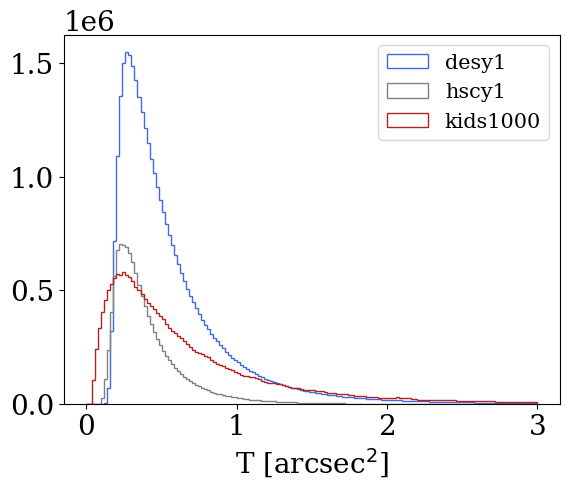

In [46]:
plt.hist(y1['shear/mcal_T'][:][cutall],bins=150,range=[0,3],label='desy1',histtype='step',color='royalblue')
plt.hist(hscy1['shear/T'][:],bins=150,range=[0,3],label='hscy1',histtype='step',color='grey')
plt.hist(kids['shear/T'][:],bins=150,range=[0,3],label='kids1000',histtype='step',color='firebrick')
#plt.hist(y3['shear/mcal_T'][:],bins=150,range=[0,5],label='desy3',alpha=0.4)

plt.xlabel(r'T [arcsec$^2$]')
plt.legend(fontsize=15)
plt.savefig('./plots/comphist_Tgal')
plt.show()

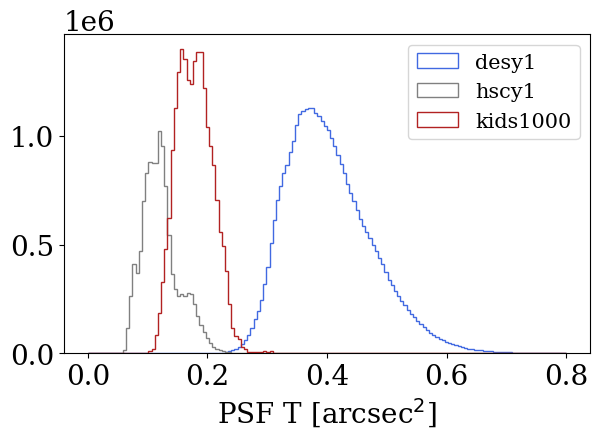

In [31]:
fig = plt.figure(layout='tight')

plt.hist(y1['shear/mcal_psf_T_mean'][:][cutall],bins=150,range=[0,0.8],label='desy1',histtype='step',color='royalblue')
plt.hist(hscy1['shear/psf_T_mean'][:],bins=150,range=[0,0.8],label='hscy1',histtype='step',color='grey')
plt.hist(kids['shear/psf_T_mean'][:],bins=150,range=[0,0.8],label='kids1000',histtype='step',color='firebrick')
#plt.hist(y3['shear/mcal_T'][:],bins=150,label='desy3',alpha=0.4)

#plt.xlim([-10,10])
#plt.yscale('log')
plt.xlabel(r'PSF T [arcsec$^2$]')
#plt.xscale('log')
plt.legend(fontsize=15)
plt.savefig('./plots/comphist_PSFT')
plt.show()

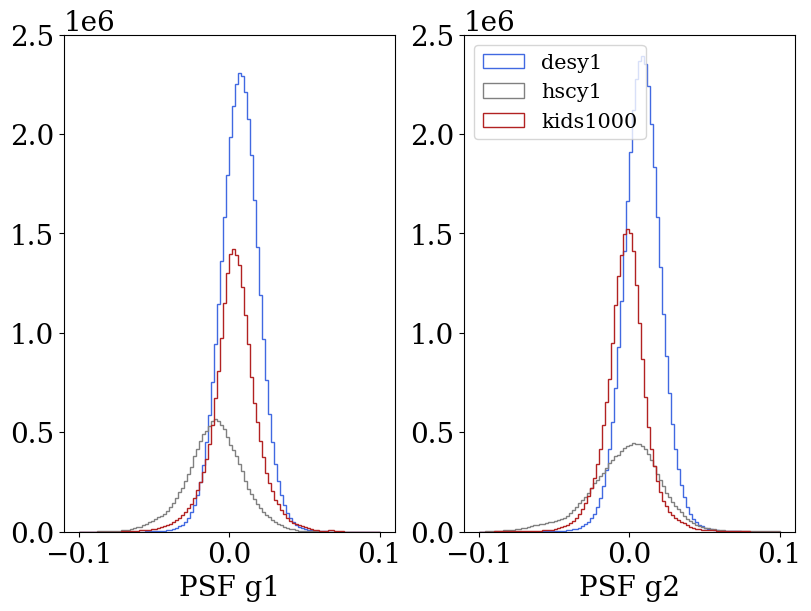

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(8, 6),layout='constrained')
ax1, ax2 = ax.flatten()
ax1.hist(y1['shear/mcal_psf_g1'][:][cutall],bins=100,range=[-0.1,0.1],label='desy1',histtype='step',color='royalblue')
ax1.hist(hscy1['shear/psf_g1'][:]/2,bins=100,range=[-0.1,0.1],label='hscy1',histtype='step',color='grey')
ax1.hist(kids['shear/psf_g1'][:],bins=100,range=[-0.1,0.1],label='kids1000',histtype='step',color='firebrick')
ax1.set_ylim([0,2.5*10**6])
ax1.set_xlabel('PSF g1')
#ax1.set_yscale('log')

ax2.hist(y1['shear/mcal_psf_g2'][:][cutall],bins=100,range=[-0.1,0.1],label='desy1',histtype='step',color='royalblue')
ax2.hist(hscy1['shear/psf_g2'][:]/2,bins=100,range=[-0.1,0.1],label='hscy1',histtype='step',color='grey')
ax2.hist(kids['shear/psf_g2'][:],bins=100,range=[-0.1,0.1],label='kids1000',histtype='step',color='firebrick')
ax2.set_ylim([0,2.5*10**6])
ax2.set_xlabel('PSF g2')
#ax2.set_yscale('log')
plt.legend(fontsize=15)
plt.savefig('./plots/comphist_psfg')
plt.show()

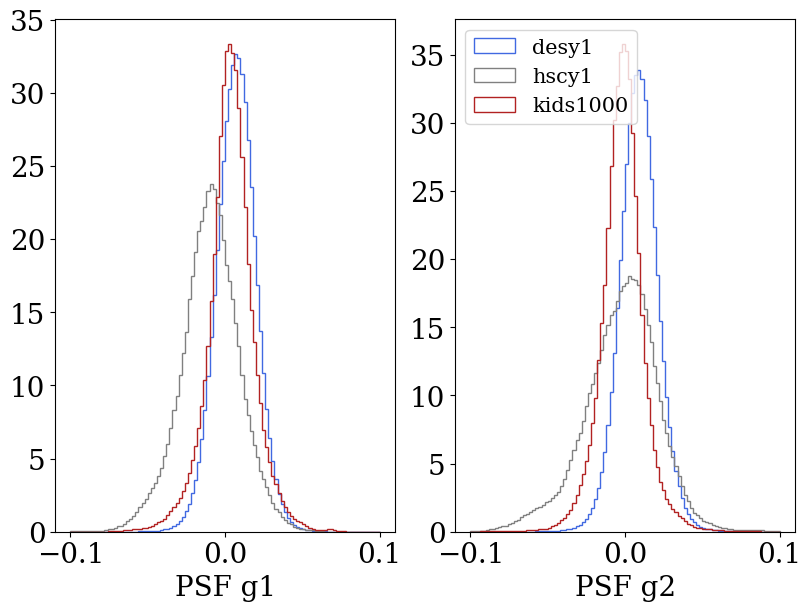

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(8, 6),layout='constrained')
ax1, ax2 = ax.flatten()
ax1.hist(y1['shear/mcal_psf_g1'][:][cutall],bins=100,range=[-0.1,0.1],label='desy1',histtype='step',color='royalblue', density=True)
ax1.hist(hscy1['shear/psf_g1'][:]/2,bins=100,range=[-0.1,0.1],label='hscy1',histtype='step',color='grey', density=True)
ax1.hist(kids['shear/psf_g1'][:],bins=100,range=[-0.1,0.1],label='kids1000',histtype='step',color='firebrick', density=True)
#ax1.set_xlim([-0.2,0.2])
ax1.set_xlabel('PSF g1')
#ax1.set_yscale('log')

ax2.hist(y1['shear/mcal_psf_g2'][:][cutall],bins=100,range=[-0.1,0.1],label='desy1',histtype='step',color='royalblue', density=True)
ax2.hist(hscy1['shear/psf_g2'][:]/2,bins=100,range=[-0.1,0.1],label='hscy1',histtype='step',color='grey', density=True)
ax2.hist(kids['shear/psf_g2'][:],bins=100,range=[-0.1,0.1],label='kids1000',histtype='step',color='firebrick', density=True)
#ax2.set_xlim([-0.2,0.2])
ax2.set_xlabel('PSF g2')
#ax2.set_yscale('log')
plt.legend(fontsize=15)
plt.savefig('comphist_psfg')
plt.show()

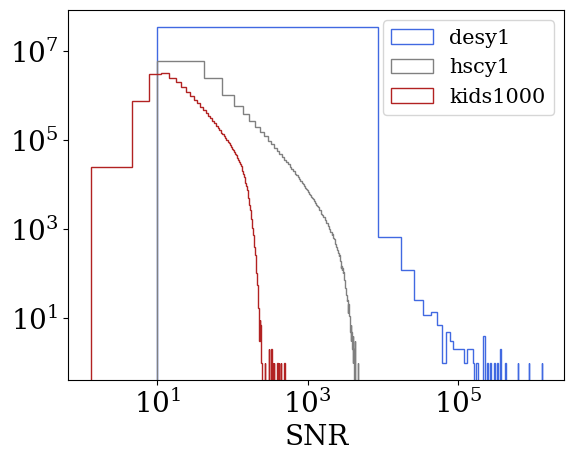

In [53]:
plt.hist(y1['shear/mcal_s2n'][:][cutall],bins=150,label='desy1',histtype='step',color='royalblue')
plt.hist(hscy1['shear/s2n'][:][hscy1['shear/s2n'][:]>10],bins=150,label='hscy1',histtype='step',color='grey')
plt.hist(kids['shear/s2n'][:],bins=150,label='kids1000',histtype='step',color='firebrick')
#plt.hist(y3['shear/mcal_T'][:],bins=150,label='desy3',alpha=0.4)

#plt.xlim([-10,10])
plt.yscale('log')
plt.xlabel(r'SNR')
plt.xscale('log')
plt.legend(fontsize=15)
plt.savefig('./plots/comphist_snr')
plt.show()

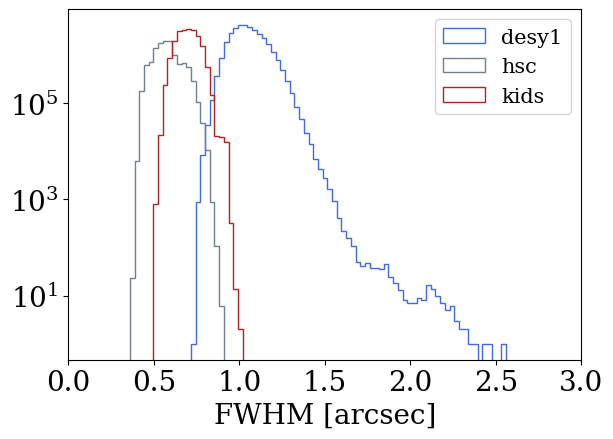

In [39]:
fig = plt.figure(layout='tight')

plt.hist((y1psfT/2)**0.5*2.35,range=(0.25,3), bins=100, histtype='step',color='royalblue',label='desy1')
#plt.hist((y3psfT/2)**0.5*2.35,range=(0.25,3), bins=100, histtype='step',color='darkblue',label='desy3')
plt.hist((hscy1T/2)**0.5*2.35,range=(0.25,3), bins=100, histtype='step',color='slategrey',label='hsc')
plt.hist((kidsT/2)**0.5*2.35,range=(0.25,3), bins=100, histtype='step',color='firebrick',label='kids')
plt.xlabel('FWHM [arcsec]')
plt.xlim([0,3])
plt.yscale('log')
plt.legend(fontsize=15)
plt.savefig('./plots/comp_seeing')